# Rectifier - State Events

In [1]:
using Modia
using Modia.Electric
using ModiaMath.plot

 

Welcome to Modia - Dynamic Modeling with Julia
Version 0.1 - 2018-07-29




Modia has a contruct positive(c), which signals that a state event occurs when c becomes positive or negative and returns true when c>0.

Using this constrct it is possible to model an ideal diode. The i versus u characteristics is described as a parametric curve with curve parameter s: (v(s), i(s)), since the characteristic is vertical for non-negative voltage.

The Modia model of the ideal diaode is:

In [2]:
using Modia.Synchronous.positive
@model IdealDiode begin # Ideal diode
  @extends OnePort()
  @inherits v, i
  s = Float(start=0.0) # Auxiliary variable for actual position on the ideal diode characteristic
#=   s = 0: knee point
     s < 0: below knee point, diode conducting
     s > 0: above knee point, diode locking 
=#
@equations begin
  v = if positive(s); 0 else s end
  i = if positive(s); s else 0 end 
  end
end;

In [3]:
Rload=10;

In [4]:
@model Rectifier begin
  R=Resistor(R=Rload)
  r=Resistor(R=0.1)
  C=Capacitor(C=1,start=0)
  D=IdealDiode()
  V=SineVoltage(V=5,freqHz=1.5, offset=0, startTime=0)
@equations begin
  connect(V.p, D.p)
  connect(D.n, R.p)
  connect(R.n, r.p)
  connect(r.n, V.n)
  connect(C.n, R.n)
  connect(C.p, R.p)
  end
end;

In [7]:
result = simulate(Rectifier, 2);


Simulating model: Rectifier
Number of equations: 33
Number of variables: 35
Number of continuous states: 2


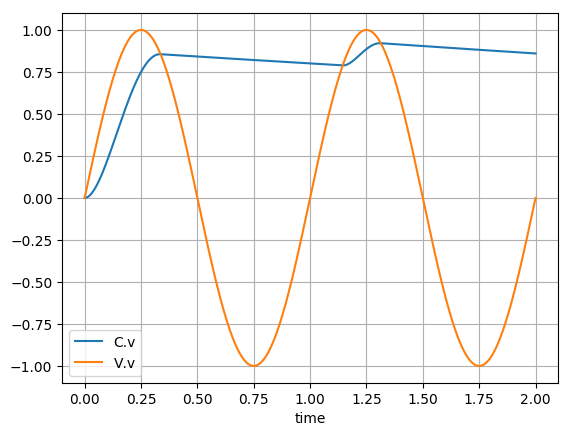

In [8]:
plot(result, ("C.v", "V.v"))